In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import glob

In [2]:
exams = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
#herhangi hata oluşmasına karşın copy alındı.
exams_df = exams.copy()
exams_df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
exams_df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [5]:
yenicolumns = { 'Unnamed: 0':"isimsiz", 'Gender':"cinsiyet", 'EthnicGroup':"etnik_köken", 'ParentEduc':"aile_eğitim", 'LunchType':"öğleyemeği",
       'TestPrep':"testhazırlığı", 'ParentMaritalStatus':"medeni_durum", 'PracticeSport':"spor", 'IsFirstChild':"ilk_çocuk",
       'NrSiblings':"kardeş_sayısı", 'TransportMeans':"ulaşım", 'WklyStudyHours':"haftalık_çalışma_saati", 'MathScore':"matematik",
       'ReadingScore':"okuma", 'WritingScore':"yazma" }

In [6]:
#kolon isimleri değiştirildi ve inplace ile kalıcı hale geldi.
exams_df.rename(columns=yenicolumns,inplace=True) 

In [7]:
#Veri üzerinde boş dönen veri var mı kontrol edilir.
exams_df.isnull().sum()

isimsiz                      0
cinsiyet                     0
etnik_köken               1840
aile_eğitim               1845
öğleyemeği                   0
testhazırlığı             1830
medeni_durum              1190
spor                       631
ilk_çocuk                  904
kardeş_sayısı             1572
ulaşım                    3134
haftalık_çalışma_saati     955
matematik                    0
okuma                        0
yazma                        0
dtype: int64

In [8]:
#kardeş sayısının medyanı bulunur. Boş değerlerin yerine medyan getirilir.
kardes_sayısı_median = exams_df["kardeş_sayısı"].median()

In [9]:
kardes_sayısı_median

2.0

In [10]:
exams_df["kardeş_sayısı"].fillna(kardes_sayısı_median,inplace=True)


In [11]:
exams_df.isnull().sum()

isimsiz                      0
cinsiyet                     0
etnik_köken               1840
aile_eğitim               1845
öğleyemeği                   0
testhazırlığı             1830
medeni_durum              1190
spor                       631
ilk_çocuk                  904
kardeş_sayısı                0
ulaşım                    3134
haftalık_çalışma_saati     955
matematik                    0
okuma                        0
yazma                        0
dtype: int64

In [12]:
#haftalık çalışma saatinde en çok 5-10 arası çalışılmış. Boş değerleri 5-10 olarak doldurabilir.
exams_df["haftalık_çalışma_saati"].value_counts()

5 - 10    16246
< 5        8238
> 10       5202
Name: haftalık_çalışma_saati, dtype: int64

In [13]:
exams_df["haftalık_çalışma_saati"].fillna("5 - 10",inplace=True)

In [14]:
exams_df.isnull().sum()

isimsiz                      0
cinsiyet                     0
etnik_köken               1840
aile_eğitim               1845
öğleyemeği                   0
testhazırlığı             1830
medeni_durum              1190
spor                       631
ilk_çocuk                  904
kardeş_sayısı                0
ulaşım                    3134
haftalık_çalışma_saati       0
matematik                    0
okuma                        0
yazma                        0
dtype: int64

In [15]:

#değerlerin cevap sayıları tespit edilir.
# boş değerler bu orana göre doldurulur.
exams_df["ulaşım"].value_counts()
exams_df["spor"].value_counts()
exams_df["testhazırlığı"].value_counts()
exams_df["ilk_çocuk"].value_counts()
exams_df["medeni_durum"].value_counts()
exams_df["aile_eğitim"].value_counts()
exams_df["etnik_köken"].value_counts()



group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: etnik_köken, dtype: int64

In [16]:
#boş değerlerin doldurulması
exams_df["ulaşım"].fillna("school_bus",inplace=True)
exams_df["spor"].fillna("sometimes",inplace=True)
exams_df["testhazırlığı"].fillna("none",inplace=True)
exams_df["ilk_çocuk"].fillna("yes",inplace=True)
exams_df["medeni_durum"].fillna("married",inplace=True)
exams_df["aile_eğitim"].fillna("some college",inplace=True)
exams_df["etnik_köken"].fillna("group B", inplace=True)

In [17]:
#tüm boş değerler temizlendi. Datayı yorumlayabiliriz.
exams_df

,isimsiz,cinsiyet,etnik_köken,aile_eğitim,öğleyemeği,testhazırlığı,medeni_durum,spor,ilk_çocuk,kardeş_sayısı,ulaşım,haftalık_çalışma_saati,matematik,okuma,yazma
0,0,female,group B,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,group B,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


Fonksiyon oluşturduk. Haftalık çalışma saati değerlerini fonksiyon aracılığıyla yeni bir sutunda yorumladık.

In [18]:
def calısma_saati(puan):
    if puan== "5 - 10" : 
        return("Tebrikler, gayet güzel gidiyorsun")
    
    elif puan== "< 5" : 
        return("Daha fazla gayret etmelisin")
    
    elif puan== "> 10" : 
        return("Çok başarılı, etkilendim ")
    

exams_df["calisma_durumu"] = exams_df.haftalık_çalışma_saati.apply(calısma_saati)



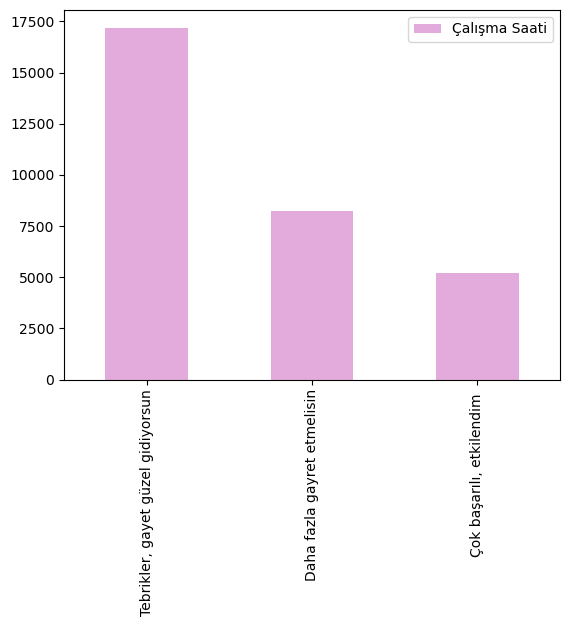

In [19]:
exams_df.calisma_durumu.value_counts().plot.bar(width =0.50,label ="Çalışma Saati",color="#e3abdb").set_title="Haftalık Çalışma Saati"
plt.legend()

#plt.legend : label'in gözükmesini sağlar.
#herhangi bir value counts görüntüleme sırasında .plot.bar(.....) komutu ile grafiğe aktarım sağladık.

5-10 saat arası çalışan kişi sayısı daha fazla ve daha az çalışan kişilerin toplamından fazladır.

# AİLE EĞİTİM DURUMUNUN MATEMATİK NOTLARINA ETKİSİ

In [48]:
aileegitim_keys = exams_df.aile_eğitim.value_counts().keys()
aileegitim_keys

Index(['some college', 'high school', 'associate's degree', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')

In [49]:
aileegitim_value = exams_df["aile_eğitim"].value_counts()

<Axes: >

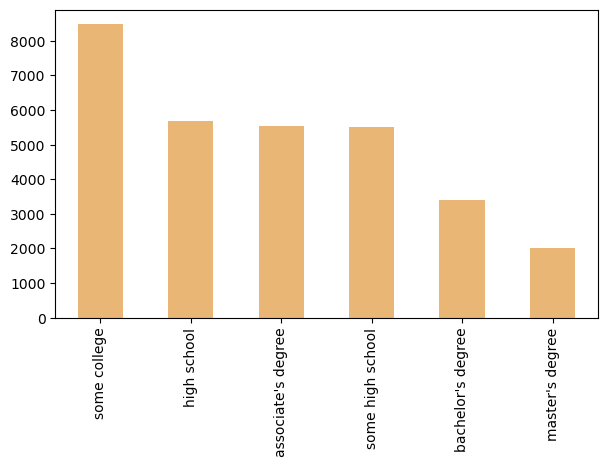

In [62]:
plt.figure(figsize=(7,4))
exams_df["aile_eğitim"].value_counts().plot(kind="bar",color="#eab676")

# Farklı dataların birbiri arasındaki ilişkiyi gözlemleme

In [69]:
exams_df.columns

Index(['isimsiz', 'cinsiyet', 'etnik_köken', 'aile_eğitim', 'öğleyemeği',
       'testhazırlığı', 'medeni_durum', 'spor', 'ilk_çocuk', 'kardeş_sayısı',
       'ulaşım', 'haftalık_çalışma_saati', 'matematik', 'okuma', 'yazma',
       'calisma_durumu'],
      dtype='object')

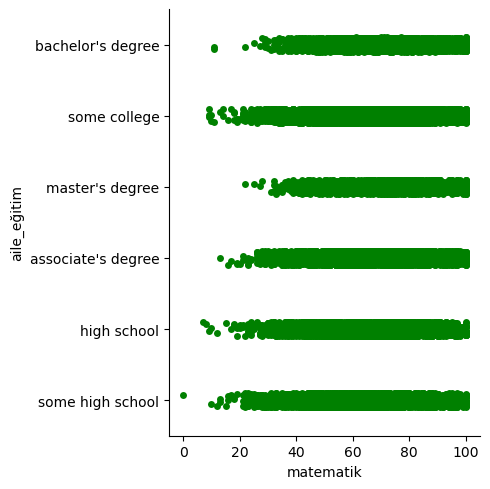

In [92]:
sbn.catplot(x="matematik",y="aile_eğitim",data=exams_df,color="g")
plt.show()

<Axes: xlabel='matematik', ylabel='Count'>

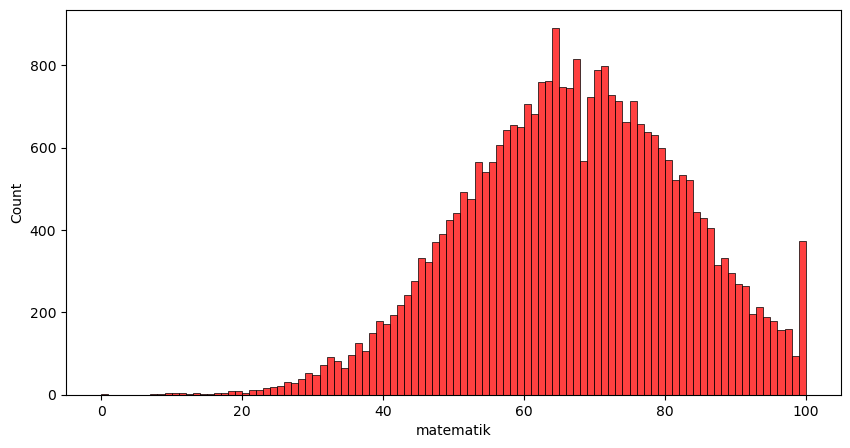

In [94]:
plt.figure(figsize=(10,5))
sbn.histplot(exams_df["matematik"],color="r",bins=100)

#bins arttıkça grafik hassaslaşır.

<Axes: xlabel='yazma', ylabel='okuma'>

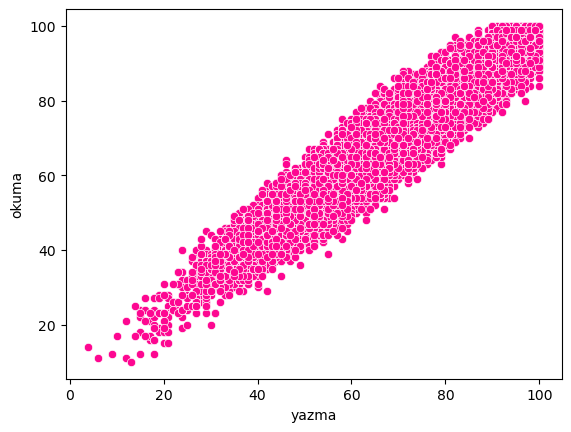

In [100]:
sbn.scatterplot(x="yazma",y="okuma",data=exams_df,color="#Fd0791")

#SCATTERPLOT farklı verileri birbiri arasında analiz eder.


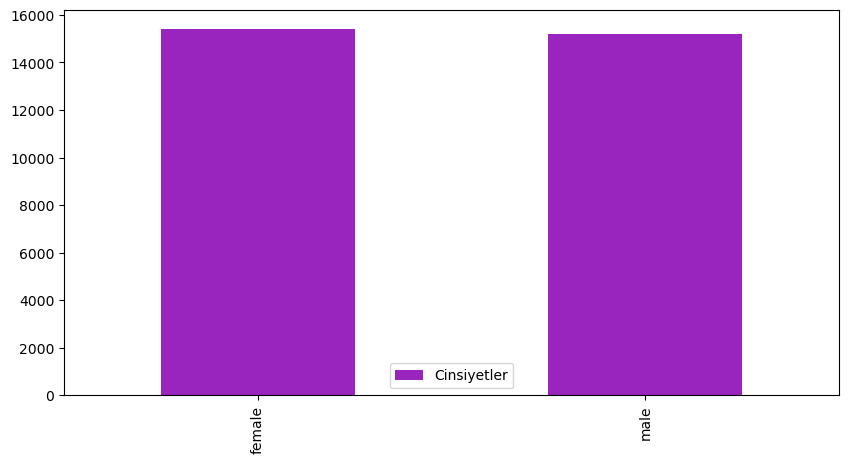

In [109]:
plt.figure(figsize=(10,5))
exams_df["cinsiyet"].value_counts().plot.bar(label="Cinsiyetler",color="#9925be")
plt.title
plt.legend()